In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
dataset_path = "CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone" 

Classes: ['Cyst', 'Normal', 'Stone', 'Tumor']
Number of classes: 4
Total images: 12446

Images per class:
Cyst: 3709
Normal: 5077
Stone: 1377
Tumor: 2283


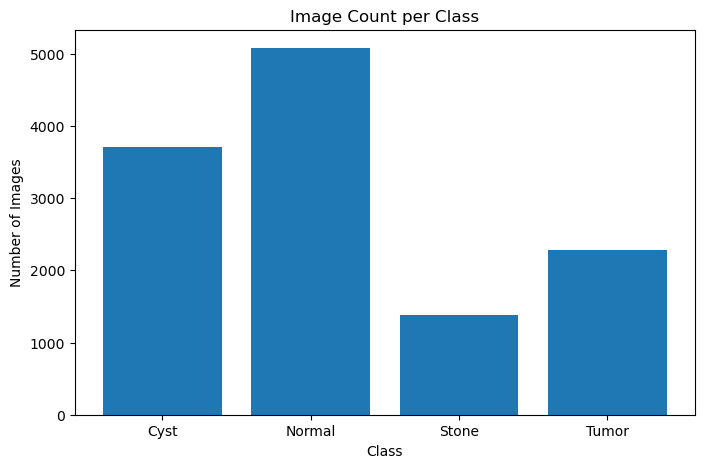

In [2]:
dataset_path = "CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone" 
class_names = []
image_counts = {}

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_path):
        class_names.append(class_name)
        image_counts[class_name] = len(os.listdir(class_path))

print("Classes:", class_names)
print("Number of classes:", len(class_names))
print("Total images:", sum(image_counts.values()))
print("\nImages per class:")
for k, v in image_counts.items():
    print(f"{k}: {v}")


plt.figure(figsize=(8,5))
plt.bar(image_counts.keys(), image_counts.values())
plt.title("Image Count per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

In [ ]:
image_shapes = []

for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    
    for img_name in os.listdir(class_path)[:50]:
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        
        if img is not None:
            image_shapes.append(img.shape[:2])  

image_shapes = np.array(image_shapes)

print("Image Height - Min:", image_shapes[:,0].min(),
      "Max:", image_shapes[:,0].max())

print("Image Width  - Min:", image_shapes[:,1].min(),
      "Max:", image_shapes[:,1].max())


Image Height - Min: 512 Max: 1001
Image Width  - Min: 512 Max: 1236


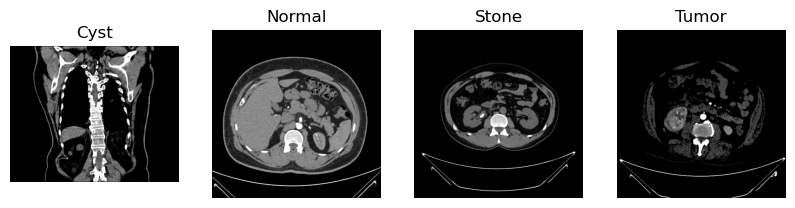

In [4]:
plt.figure(figsize=(10,6))

for i, class_name in enumerate(class_names):
    class_path = os.path.join(dataset_path, class_name)
    img_name = os.listdir(class_path)[0]
    img_path = os.path.join(class_path, img_name)
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1, len(class_names), i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.show()


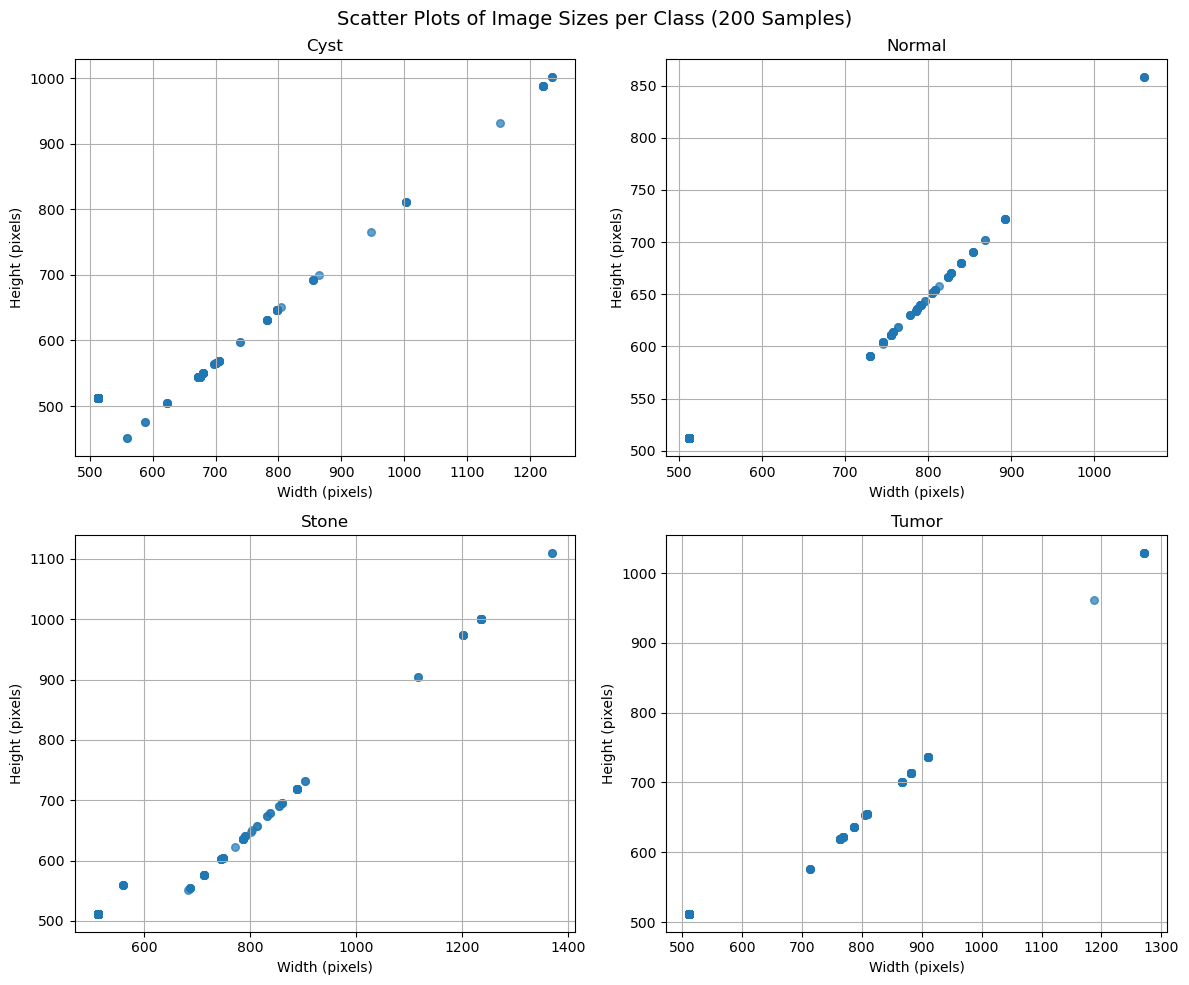

In [9]:


TOTAL_SAMPLES = 1000

class_names = sorted(os.listdir(dataset_path))
num_classes = len(class_names)
samples_per_class = TOTAL_SAMPLES // num_classes


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, class_name in enumerate(class_names):
    class_path = os.path.join(dataset_path, class_name)
    images = os.listdir(class_path)
    
    sampled_images = random.sample(images, min(samples_per_class, len(images)))
    
    widths = []
    heights = []

    for img_name in sampled_images:
        img_path = os.path.join(class_path, img_name)
        try:
            with Image.open(img_path) as img:
                w, h = img.size
                widths.append(w)
                heights.append(h)
        except:
            continue

    ax = axes[idx]
    ax.scatter(widths, heights, alpha=0.7, s=30)
    ax.set_title(class_name)
    ax.set_xlabel("Width (pixels)")
    ax.set_ylabel("Height (pixels)")
    ax.grid(True)

plt.suptitle("Scatter Plots of Image Sizes per Class (200 Samples)", fontsize=14)
plt.tight_layout()
plt.show()


In [3]:
def class_pixel_mean(class_path):
    means = []

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue   
        img = img.astype("float32")
        means.append(np.mean(img))
    return np.mean(means)

for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        mean_value = class_pixel_mean(class_dir)
        print(f"Class: {class_name} → Pixel Mean: {mean_value:.2f}")

Class: Cyst → Pixel Mean: 26.45
Class: Normal → Pixel Mean: 44.66
Class: Stone → Pixel Mean: 35.40
Class: Tumor → Pixel Mean: 36.28


In [4]:
def class_pixel_std(class_path):
    std = []

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue   
        img = img.astype("float32")
        std.append(np.std(img))
    return np.mean(std)

for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        std_value = class_pixel_std(class_dir)
        print(f"Class: {class_name} → Pixel std: {std_value:.2f}")

Class: Cyst → Pixel std: 49.13
Class: Normal → Pixel std: 65.17
Class: Stone → Pixel std: 55.01
Class: Tumor → Pixel std: 60.35


In [6]:
def class_pixel_min_max(class_path):
    min=[]
    max=[]

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue   
        img = img.astype("float32")
        min.append(np.min(img))
        max.append(np.max(img))

    return np.mean(min),np.mean(max)

for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        min, max=  class_pixel_min_max(class_dir)
        print(f"Class: {class_name} → Min: {min:.2f}, Max: {max:.2f}")

Class: Cyst → Min: 0.00, Max: 255.00
Class: Normal → Min: 0.00, Max: 255.00
Class: Stone → Min: 0.00, Max: 255.00
Class: Tumor → Min: 0.00, Max: 255.00
